<a href="https://colab.research.google.com/github/soltiste/ii-in-economi/blob/main/mltask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для датасета https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
Обучить SVM, подобрать параметры, посчитать метрики качества классификации
Обучить Decision Tree Classifier, подобрать параметры, посчитать метрики качества классификации

Описание колонок:

1.Age(numerical)
  	  	age in years
2.Blood Pressure(numerical)
	       	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical) bgr in mgs/dl 11.Blood Urea(numerical)
		bu in mgs/dl
 	12.Serum Creatinine(numerical)
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)
		rc in millions/cmm
 	19.Hypertension(nominal)
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)
		class - (ckd,notckd)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from google.colab.data_table import DataTable
DataTable.max_columns = 35

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df = df.drop(columns='id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

Посмотрев на описание данных и готовый датафрейм я увидела ряд ошибок, которые хотелось бы исправить для эффективной работы модели

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
mis = ['sg', 'al', 'su']
for m in mis:
  cat_cols.append(m)
  num_cols.remove(m)

In [ ]:
def unique_in_columns(data_frame, cols):
  res = []
  for c in cols:
    res.append((c, data_frame[c].unique()))
  return res

In [ ]:
unique_in_columns(df, cat_cols)

[('rbc', array([nan, 'normal', 'abnormal'], dtype=object)),
 ('pc', array(['normal', 'abnormal', nan], dtype=object)),
 ('pcc', array(['notpresent', 'present', nan], dtype=object)),
 ('ba', array(['notpresent', 'present', nan], dtype=object)),
 ('htn', array(['yes', 'no', nan], dtype=object)),
 ('dm', array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)),
 ('cad', array(['no', 'yes', '\tno', nan], dtype=object)),
 ('appet', array(['good', 'poor', nan], dtype=object)),
 ('pe', array(['no', 'yes', nan], dtype=object)),
 ('ane', array(['no', 'yes', nan], dtype=object)),
 ('classification', array(['ckd', 'ckd\t', 'notckd'], dtype=object)),
 ('sg', array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])),
 ('al', array([ 1.,  4.,  2.,  3.,  0., nan,  5.])),
 ('su', array([ 0.,  3.,  4.,  1., nan,  2.,  5.]))]

In [ ]:
df['dm'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
df['cad'].replace('\tno', 'no', inplace=True)
df['classification'].replace({'ckd\t': 0, 'notckd': 0, 'ckd': 1}, inplace=True)

In [ ]:
unique_in_columns(df, num_cols)

[('age',
  array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
         61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
         45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
         74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
         81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
         19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])),
 ('bp',
  array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])),
 ('bgr',
  array([121.,  nan, 423., 117., 106.,  74., 100., 410., 138.,  70., 490.,
         380., 208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108.,
         156., 264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137.,
         204.,  79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,
          86., 150., 146., 425., 112., 250., 360., 163., 129., 133., 102.,
         158., 165., 132., 104., 127., 415., 169., 251., 109., 280., 210.,
    

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
df[num_cols].describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,54.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


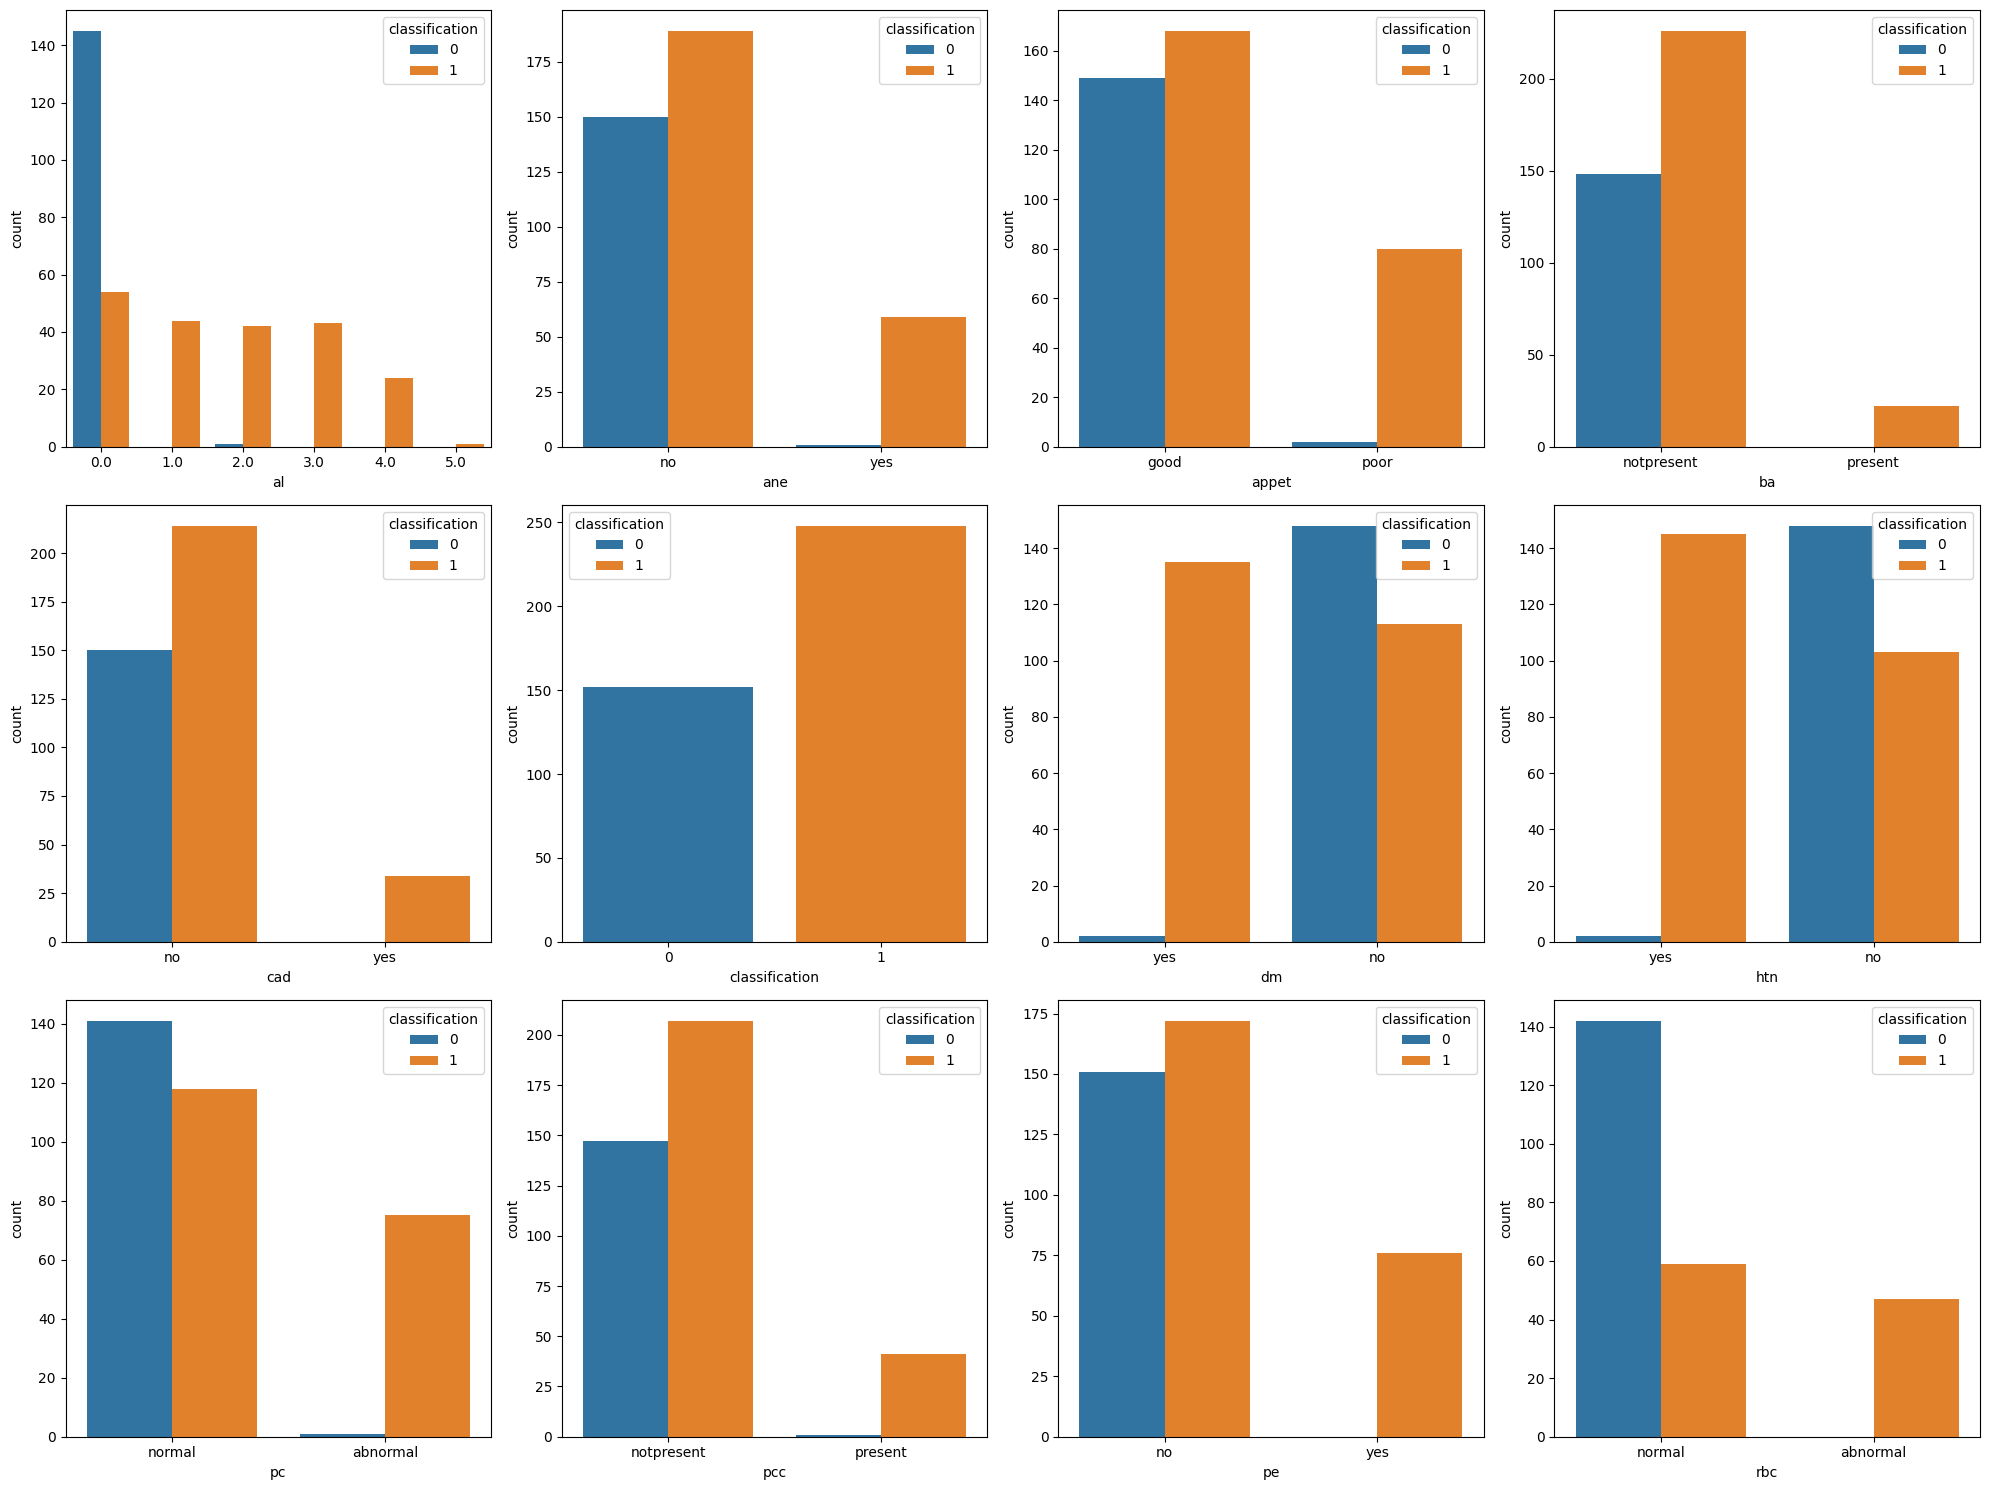

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in sorted(cat_cols):
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df, x=column, hue='classification')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

Для заполнения недостающих данных в интернете я обнаружила следующие методы:
1)ad-hoc

In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
for col in num_cols:
    random_value_imputation(col)
for col in cat_cols:
    impute_mode(col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [ ]:
df[num_cols].describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.60000,147.795000,56.888000,3.045125,137.678750,4.567250,12.515750,39.005000,8266.500000,4.698000
std,16.974966,13.72629,77.408936,49.657155,5.646235,9.552384,2.842596,2.918625,8.921264,2804.441116,1.047898
min,2.000000,50.00000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.00000,100.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.750000,6400.000000,3.900000
50%,54.000000,80.00000,122.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.500000,7900.000000,4.800000
75%,64.000000,80.00000,165.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.500000
max,90.000000,180.00000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
def kde(col):
    grid = sns.FacetGrid(df, hue="classification", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

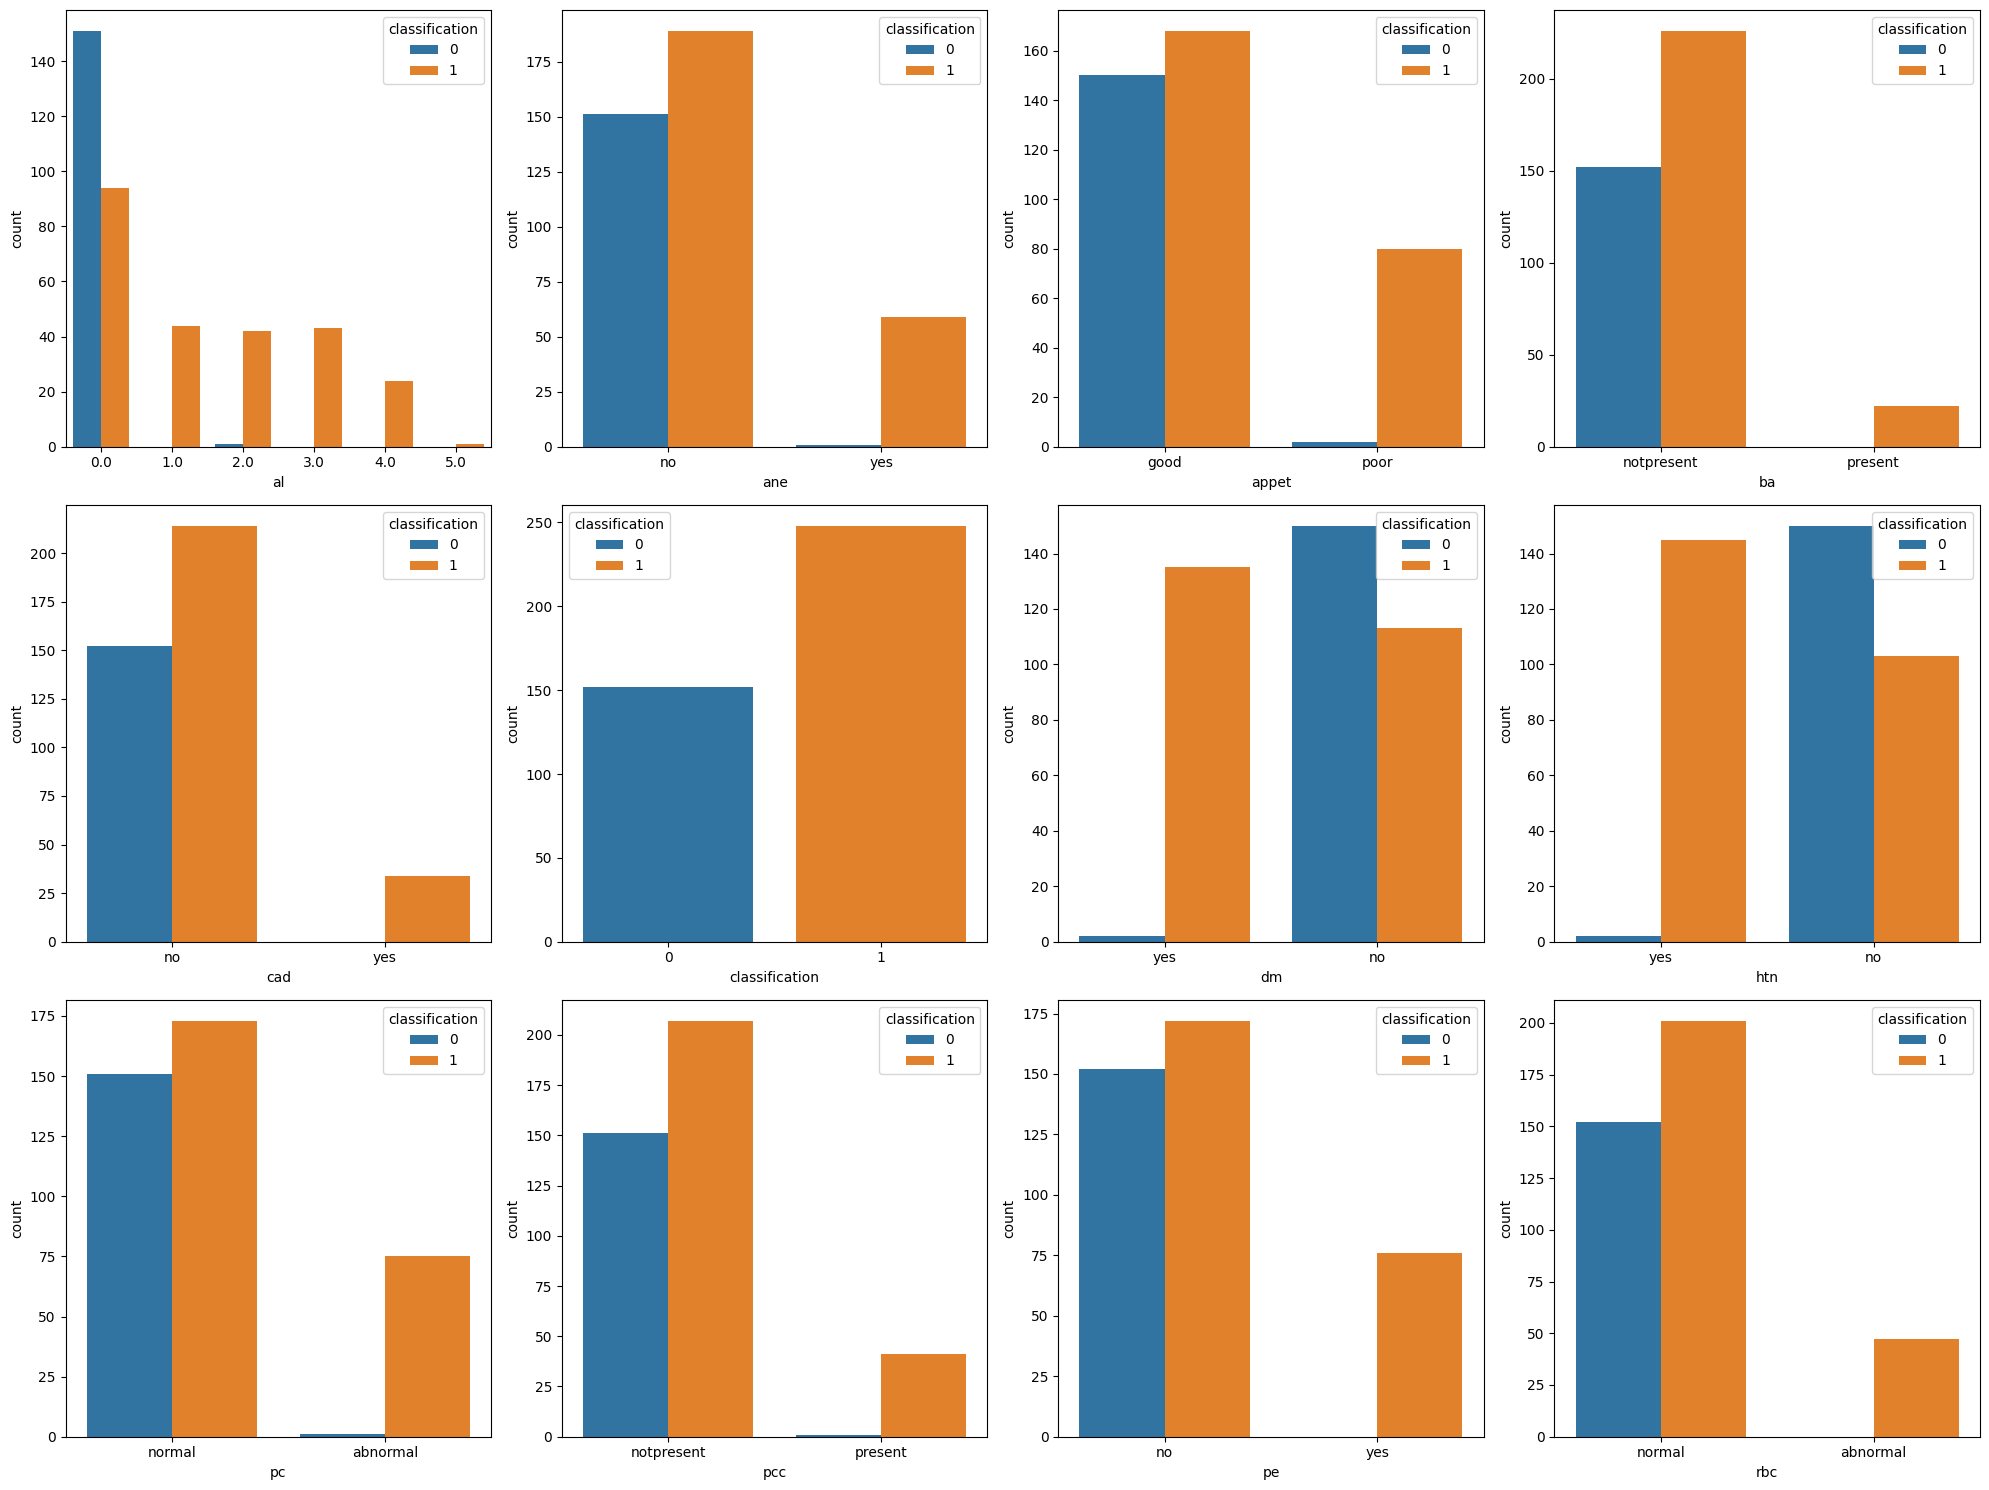

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in sorted(cat_cols):
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df, x=column, hue='classification')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

В результате работы этого метода, я решила отказаться от рассмотрения признака rbc - слишком много значений ппропущено, это может существенно влиять на распределение классов по ответам. То же можно сказать и о признаке rc и sod

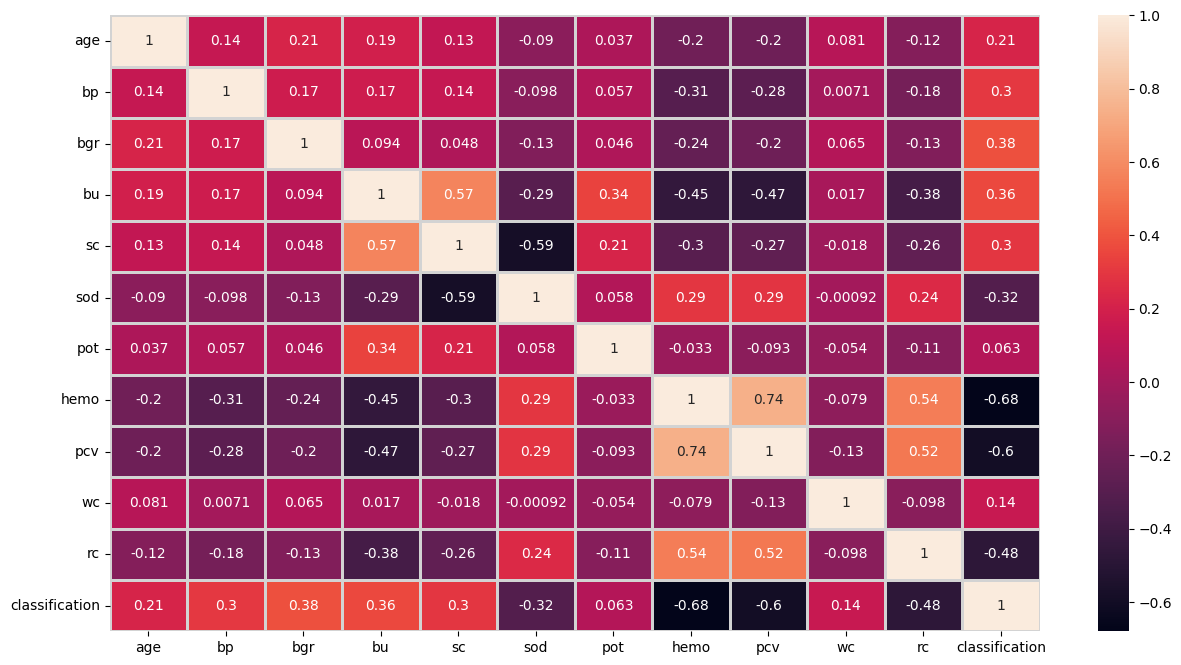

In [ ]:
num_cols.append('classification')
plt.figure(figsize = (15, 8))
sns.heatmap(df[num_cols].corr('pearson'), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

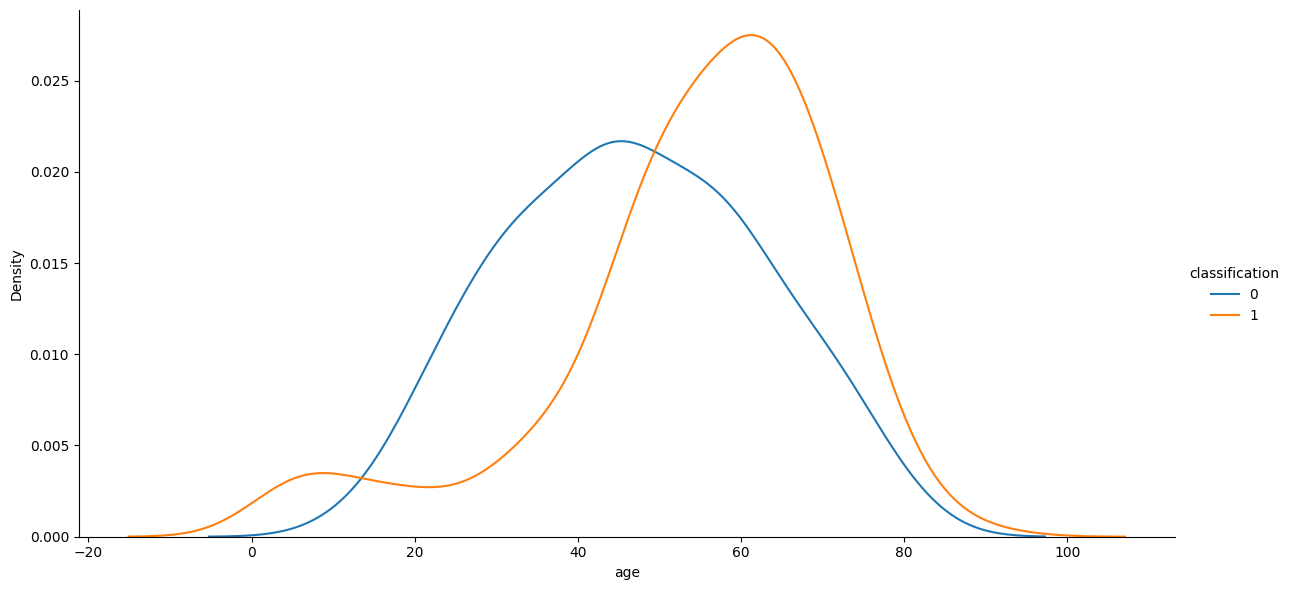

In [ ]:
kde('age')

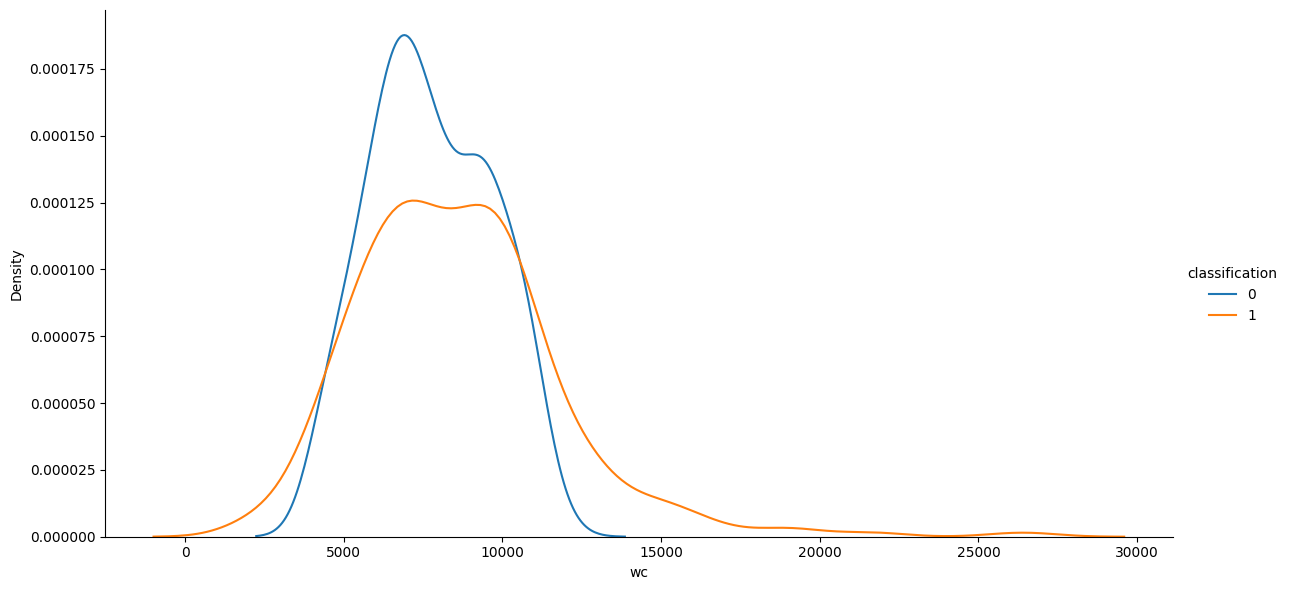

In [ ]:
kde('wc')

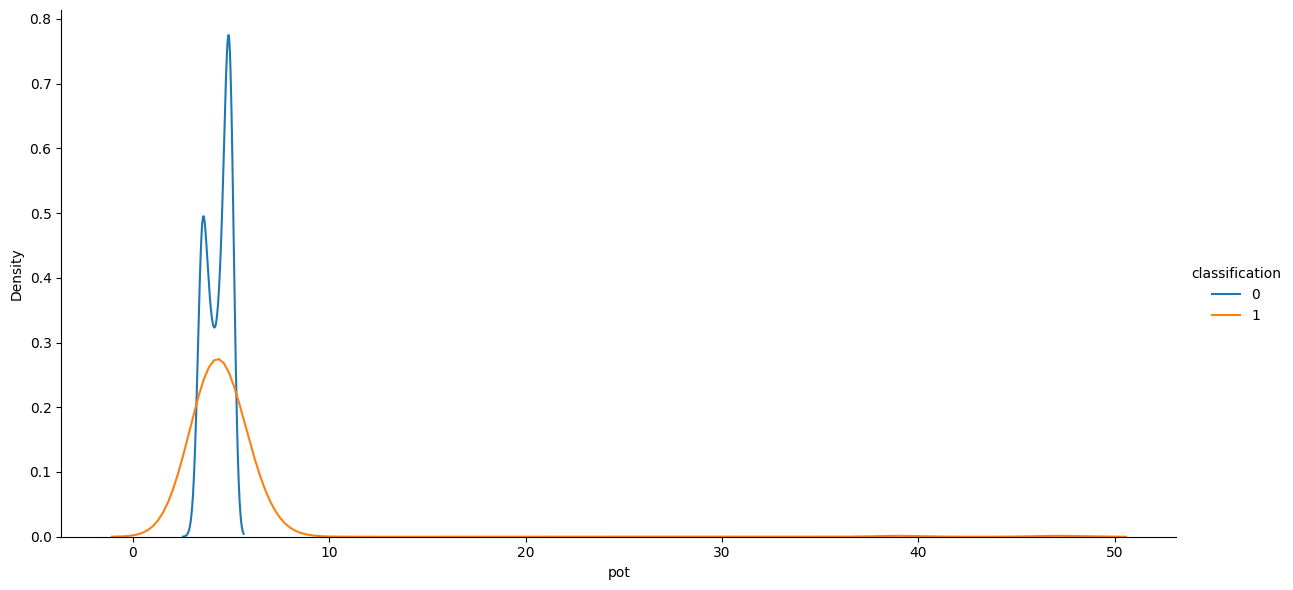

In [ ]:
kde('pot')

In [ ]:
df.drop(columns=['wc', 'pot'], inplace=True)

In [ ]:
num_cols.remove('wc')

In [ ]:
num_cols.remove('pot')

По диаграммам выше мы понимаем, что в силу слабой зависимости wc и pot признаков от класса, мы можем отказаться от них для увеличения скорости работы

Закодируем категориальные признаки

In [ ]:
cat_cols_le = ['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']
cat_cols_ohe = ['sg',
 'al',
 'su']

In [ ]:
le = LabelEncoder()
for col in cat_cols_le:
    df[col] = le.fit_transform(df[col])

In [ ]:
for col in cat_cols_ohe:
  onehotencoder = OneHotEncoder(sparse = False)
  encoded_df = pd.DataFrame(onehotencoder.fit_transform(df[[col]]))
  encoded_df.columns = onehotencoder.get_feature_names_out()
  df.drop(col, axis = 1, inplace = True)
  df = df.join(encoded_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head(10)

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,48.0,80.0,1,1,0,0,121.0,36.0,1.2,141.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1,1,0,0,172.0,18.0,0.8,135.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1,1,0,0,423.0,53.0,1.8,139.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,48.0,70.0,1,0,1,0,117.0,56.0,3.8,111.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,51.0,80.0,1,1,0,0,106.0,26.0,1.4,140.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,60.0,90.0,1,1,0,0,74.0,25.0,1.1,142.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,68.0,70.0,1,1,0,0,100.0,54.0,24.0,104.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,24.0,80.0,1,0,0,0,410.0,31.0,1.1,135.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,52.0,100.0,1,0,1,0,138.0,60.0,1.9,138.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,53.0,90.0,0,0,1,0,70.0,107.0,7.2,114.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


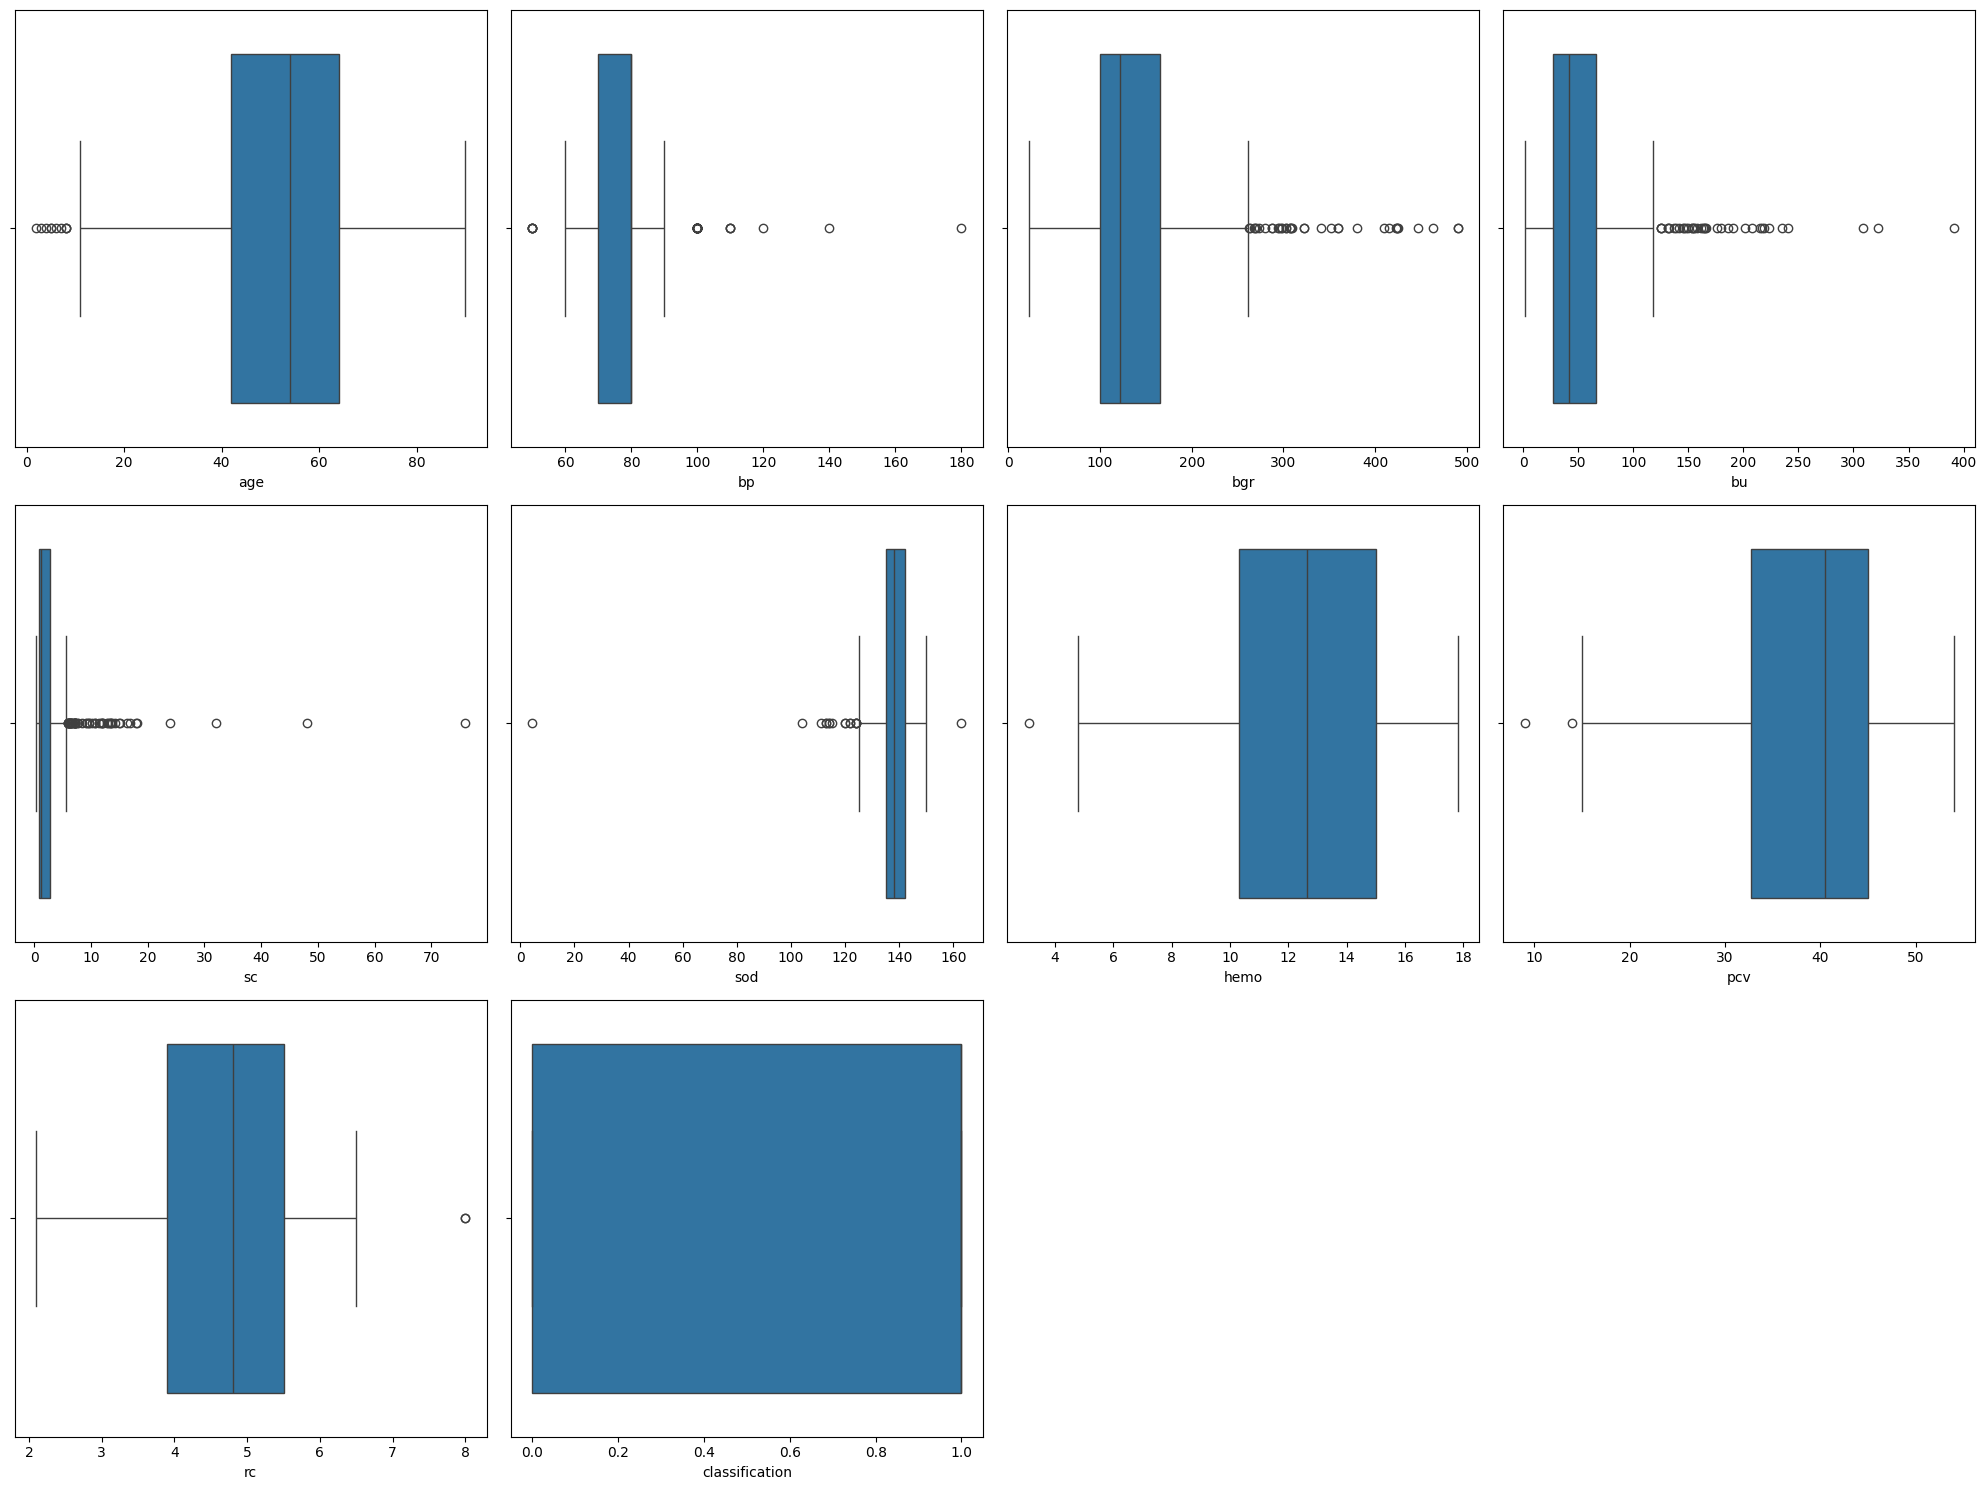

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(df, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
z = np.abs(df[num_cols].apply(stats.zscore))
df_clean_by_z = df[(z<3).all(axis=1)]
df_clean_by_z.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,...,371.000000,371.000000,371.000000,371.0,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,51.014422,75.687332,0.894879,0.835580,0.088949,0.051213,138.566038,51.297035,2.369137,138.388140,...,0.097035,0.099730,0.059299,0.0,0.870620,0.029650,0.043127,0.029650,0.024259,0.002695
std,17.198132,12.002222,0.307124,0.371157,0.285054,0.220729,60.610300,36.887744,2.798561,6.353996,...,0.296405,0.300045,0.236503,0.0,0.336073,0.169848,0.203417,0.169848,0.154059,0.051917
min,2.000000,50.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,111.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.500000,70.000000,1.000000,1.000000,0.000000,0.000000,99.000000,26.000000,0.900000,135.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,80.000000,1.000000,1.000000,0.000000,0.000000,120.000000,40.000000,1.200000,139.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.000000,1.000000,0.000000,0.000000,150.000000,59.000000,2.500000,142.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,110.000000,1.000000,1.000000,1.000000,1.000000,360.000000,202.000000,18.000000,150.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,51.483376,76.60000,0.882500,0.810000,0.105000,0.055000,147.795000,56.888000,3.045125,137.678750,...,0.107500,0.107500,0.060000,0.0025,0.847500,0.032500,0.045000,0.03500,0.032500,0.007500
std,16.974966,13.72629,0.322418,0.392792,0.306937,0.228266,77.408936,49.657155,5.646235,9.552384,...,0.310136,0.310136,0.237784,0.0500,0.359955,0.177546,0.207564,0.18401,0.177546,0.086385
min,2.000000,50.00000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,42.000000,70.00000,1.000000,1.000000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,...,0.000000,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,54.000000,80.00000,1.000000,1.000000,0.000000,0.000000,122.000000,42.000000,1.300000,138.000000,...,0.000000,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,64.000000,80.00000,1.000000,1.000000,0.000000,0.000000,165.000000,66.000000,2.800000,142.000000,...,0.000000,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,90.000000,180.00000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


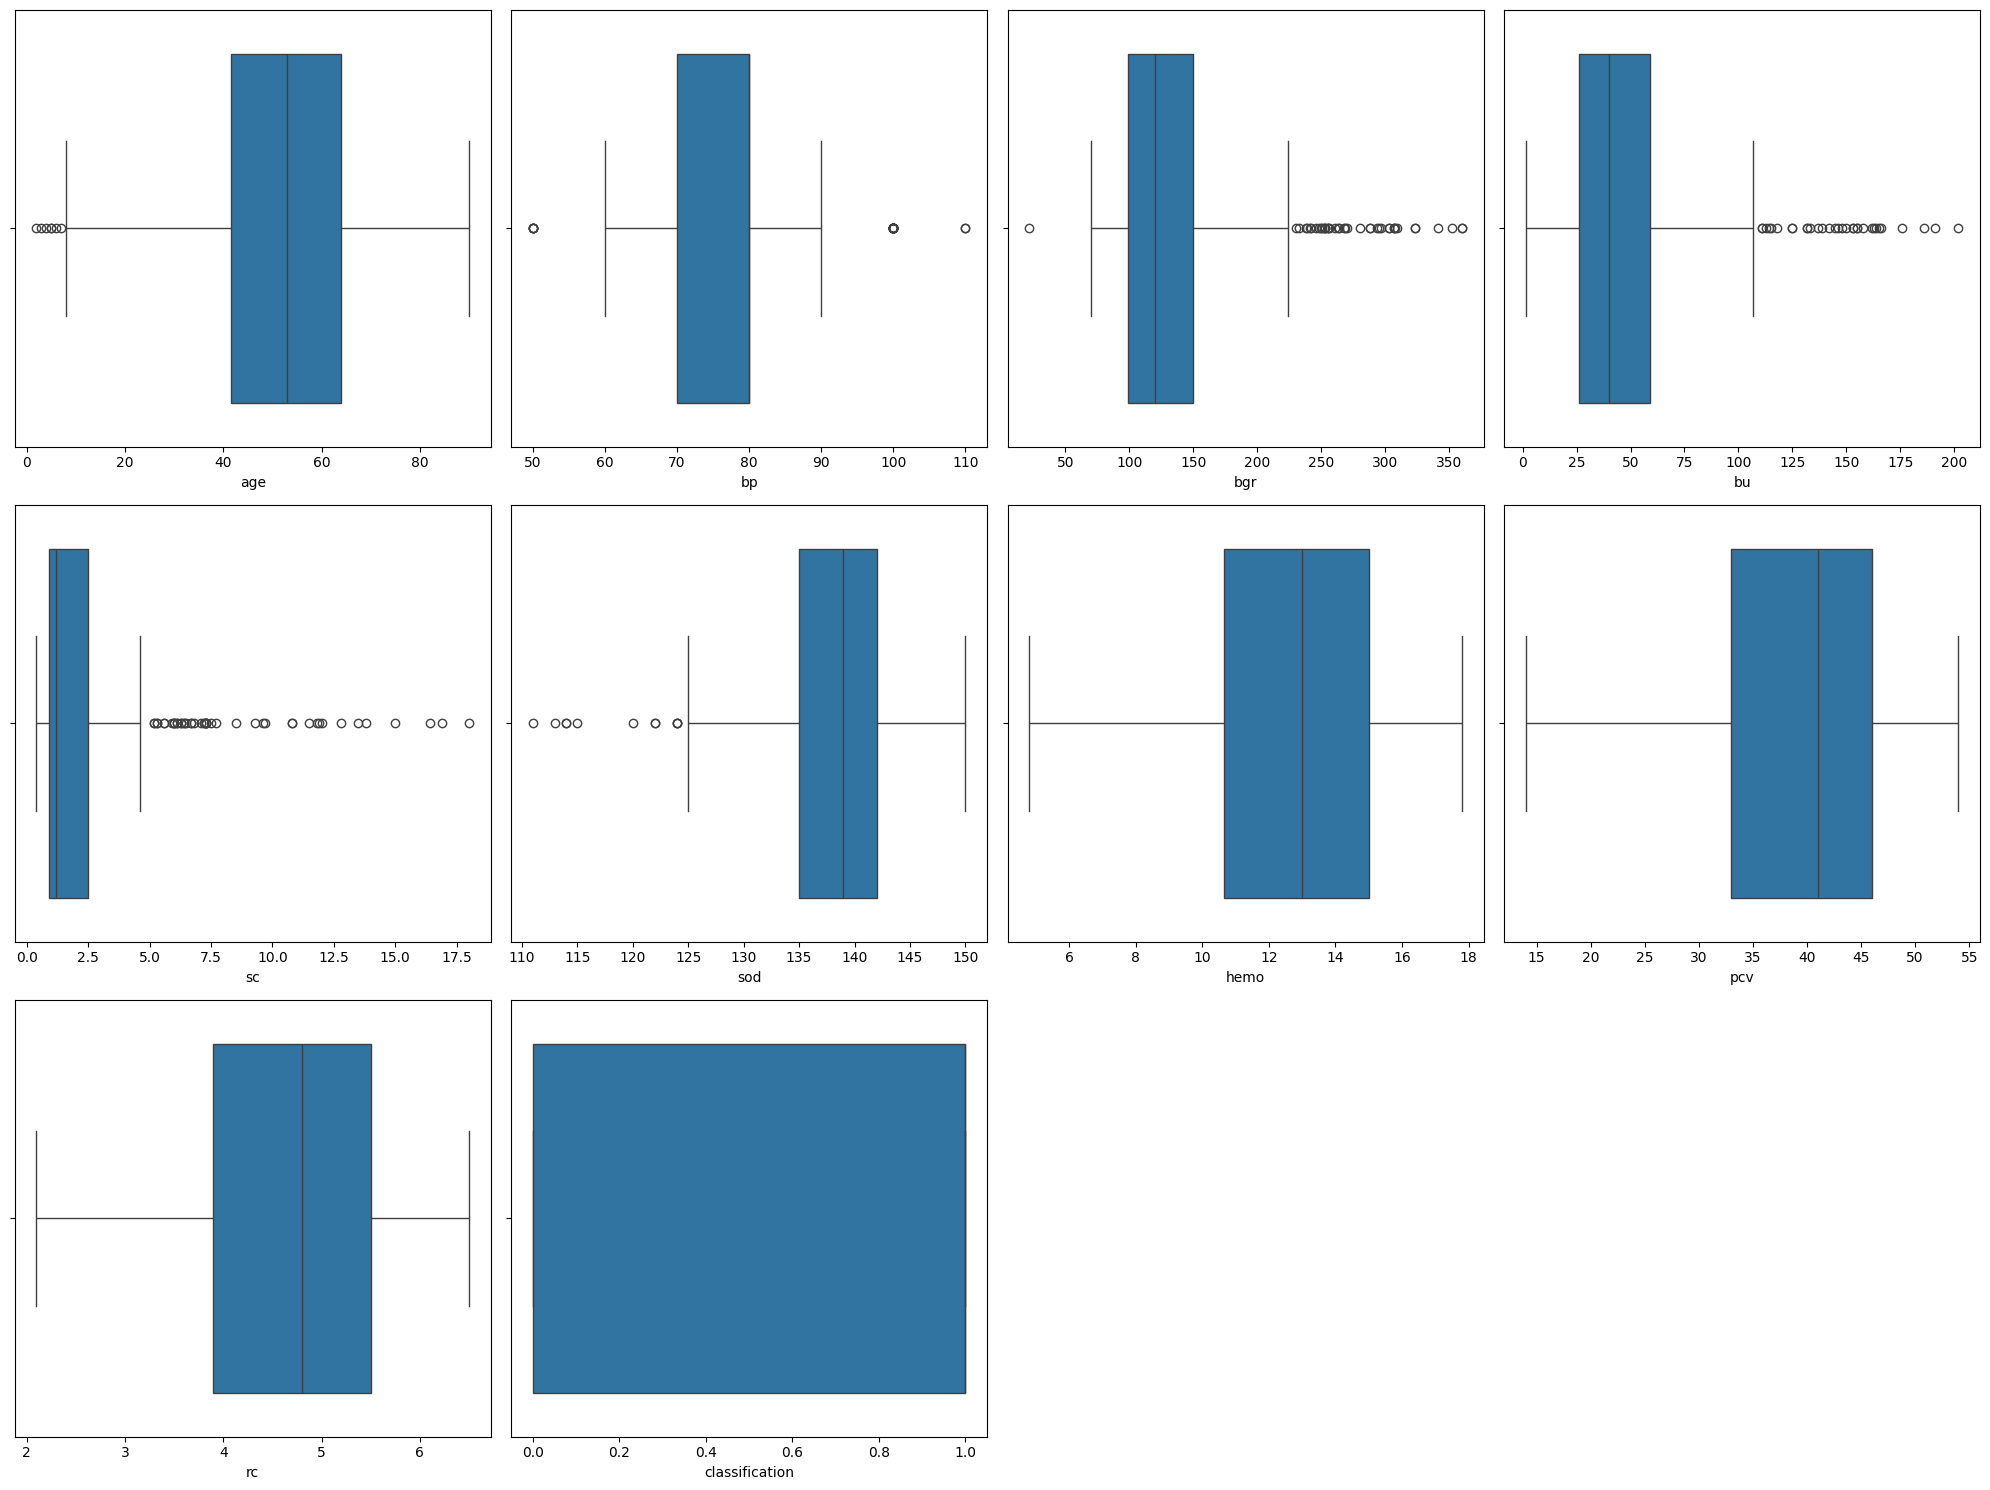

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(df_clean_by_z, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
mm_scal = MinMaxScaler()
df_n = mm_scal.fit_transform(df_clean_by_z)
df_nor = pd.DataFrame(df_n, columns=df_clean_by_z.columns)
df_nor.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,...,371.000000,371.000000,371.000000,371.0,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.556982,0.428122,0.894879,0.835580,0.088949,0.051213,0.344870,0.248364,0.111883,0.702260,...,0.097035,0.099730,0.059299,0.0,0.870620,0.029650,0.043127,0.029650,0.024259,0.002695
std,0.195433,0.200037,0.307124,0.371157,0.285054,0.220729,0.179320,0.183979,0.159009,0.162923,...,0.296405,0.300045,0.236503,0.0,0.336073,0.169848,0.203417,0.169848,0.154059,0.051917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448864,0.333333,1.000000,1.000000,0.000000,0.000000,0.227811,0.122195,0.028409,0.615385,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.579545,0.500000,1.000000,1.000000,0.000000,0.000000,0.289941,0.192020,0.045455,0.717949,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.704545,0.500000,1.000000,1.000000,0.000000,0.000000,0.378698,0.286783,0.119318,0.794872,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_nor['al_5.0'].unique()

array([0.])

In [ ]:
df_nor.drop('al_5.0',axis=1, inplace=True)

МЕТОД ОПОРНЫХ ВЕКТОРОВ

In [ ]:
ind_col = [col for col in df_nor.columns if col != 'classification']
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(df_nor[ind_col],
                                                    df_nor['classification'],
                                                    test_size = 0.33,
                                                    random_state = 42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
clf = SVC(kernel='linear')
clf.fit(X_train_nor, y_train_nor)
pred = clf.predict(X_test_nor)
pred1 = clf.predict(X_train_nor)
acc_test = accuracy_score(y_test_nor, pred)
acc_train = accuracy_score(y_train_nor, pred1)
print('accurancy:', f'train: {acc_train}', f'test: {acc_test}', sep='\n')

accurancy:
train: 0.9758064516129032
test: 0.991869918699187


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'] , 'C':[0.01, 0.1, 1, 10, 100]}
svc = SVC()
clf_grid = GridSearchCV(svc, parameters, scoring='accuracy')
clf_grid.fit(X_train_nor, y_train_nor)
clf_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
clf = SVC(kernel='rbf', C=10, probability=True)
clf.fit(X_train_nor, y_train_nor)
pred = clf.predict(X_test_nor)
pred1 = clf.predict(X_train_nor)
acc_test = accuracy_score(y_test_nor, pred)
acc_train = accuracy_score(y_train_nor, pred1)
print('accurancy:', f'train: {acc_train}', f'test: {acc_test}', sep='\n')

accurancy:
train: 0.9919354838709677
test: 0.991869918699187


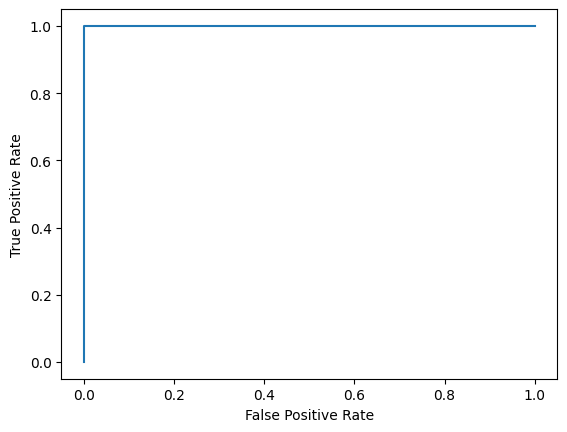

In [ ]:
from sklearn.metrics import roc_curve, auc
clf = SVC(kernel='rbf', C=10, probability=True)
clf.fit(X_train_nor, y_train_nor)
y_proba = clf.predict_proba(X_test_nor)
y_proba = y_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test_nor,  y_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'] , 'C':[0.01, 0.1, 1, 10, 100]}
svc = SVC()
clf_grid = GridSearchCV(svc, parameters, scoring='f1')
clf_grid.fit(X_train_nor, y_train_nor)
clf_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X_train_nor, y_train_nor)
pred = clf.predict(X_test_nor)
pred1 = clf.predict(X_train_nor)
f1_train = f1_score(y_train_nor, pred1)
f1_test = f1_score(y_test_nor, pred)
print('f1:', f'train: {f1_train}', f'test: {f1_test}', sep='\n')

f1:
train: 0.9930555555555556
test: 0.9931972789115647


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_train = mean_squared_error(y_train_nor, pred1)
mse_test = mean_squared_error(y_test_nor, pred)
print('1 - mse:', f'train: {1 - mse_train}', f'test: {1 - mse_test}', sep='\n')

1 - mse:
train: 0.9919354838709677
test: 0.991869918699187


МЕТОД РЕШАЮЩЕГО ДЕРЕВА

In [ ]:
ind_col = [col for col in df_nor.columns if col != 'classification']
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(df_clean_by_z[ind_col],
                                                    df_clean_by_z['classification'],
                                                    test_size = 0.33,
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(random_state=241)
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': np.arange(1, 10)}
clf_grid = GridSearchCV(dectree, parameters, scoring='accuracy')
clf_grid.fit(X_train_nor, y_train_nor)
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=241)
clf.fit(X_train_nor, y_train_nor)
pred = clf.predict(X_test_nor)
pred1 = clf.predict(X_train_nor)
acc_test = accuracy_score(y_test_nor, pred)
acc_train = accuracy_score(y_train_nor, pred1)
print('accurancy:', f'train: {acc_train}', f'test: {acc_test}', sep='\n')

accurancy:
train: 1.0
test: 0.9105691056910569


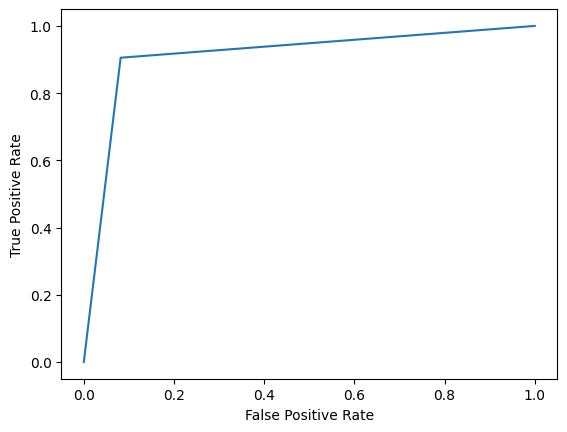

In [ ]:
y_proba = clf.predict_proba(X_test_nor)
y_proba = y_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test_nor,  y_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': np.arange(1, 10)}
clf_grid = GridSearchCV(dectree, parameters, scoring='f1')
clf_grid.fit(X_train_nor, y_train_nor)
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train_nor, y_train_nor)
pred = clf.predict(X_test_nor)
pred1 = clf.predict(X_train_nor)
f1_train = f1_score(y_train_nor, pred1)
f1_test = f1_score(y_test_nor, pred)
print('f1:', f'train: {f1_train}', f'test: {f1_test}', sep='\n')

f1:
train: 1.0
test: 0.9315068493150684


In [ ]:
mse_train = mean_squared_error(y_train_nor, pred1)
mse_test = mean_squared_error(y_test_nor, pred)
print('1 - mse:', f'train: {1 - mse_train}', f'test: {1 - mse_test}', sep='\n')

1 - mse:
train: 1.0
test: 0.9186991869918699
